In [1]:
%pip install --upgrade numpy matplotlib pandas seaborn tqdm pyarrow

  Using cached numpy-2.1.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Exploring the Experiment's Design

In this notebook, we'll get our first look at the experiment we'll be analyzing in this course; curated data from the [Steinmetz et al, 2019](https://www.nature.com/articles/s41586-019-1787-x) paper.  

The data we'll be using in this notebook is focused on three CSV files, each containing sessions from a different stretch of data collection. They contain trial-level data from the experiment: 
  - `steinmetz_winter2016.csv`
  - `steinmetz_summer2017.csv`
  - `steinmetz_winter2017.csv`

##### Analysis Goal
Our goal is to get a better understanding of the experimental setup, answering questions such as:
- how many sessions where recorded in total?
- how many mice were involved in the experiment?
- how many trials in each session?
- and more

##### Learning Goal
By going through the following exercises and exploring the dataset, we'll get practice in working with [**Pandas Dataframes**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), a tool that appears in a lot of Python data science analyses!


---

## Download Data

Run the following code to get the datasets downloaded to the 'data' folder:

In [3]:
# %pip install tqdm  # optional: install tqdm if you'd like to see progress bars during the download.

In [4]:
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/npn4isYyXOUM1hB', 'data/steinmetz_winter2017.csv')
sciebo.download_file('https://uni-bonn.sciebo.de/s/ICDCXBrmZruoZcB', 'data/steinmetz_winter2016.csv')
sciebo.download_file('https://uni-bonn.sciebo.de/s/AS2X70aUC9OJPbS', 'data/steinmetz_summer2017.csv')


### Load Data and Get a Quick Description

In this first part, we will get started with Pandas by first loading the dataset as a DataFrame (i.e. a table) and using some of the functions attached to the dataframe to get a quick look at the data. 

Below is a table containing some code, and their description, that we'll be using in this section:

| **Code**                 | **Description**                                    |
|--------------------------|----------------------------------------------------|
| `df = pd.read_csv("path/to/datafile.csv")` | Load the data stored in a CSV file as a pandas DataFrame and call it `df`. |
| `df.head(5)` or `df[:5]`                  | Take a look at the first 5 rows in the data.      |
| `df.tail(5)` or `df[-5:]`                 | Take a look at the last 5 rows in the data.       |
| `len(df)`                               | See the total number of rows (in this case, trials). |

##### Exercises

Let's get a sense of what kind of data is in these files.  Load each of the datasets into a different variable name using the `pd.read_csv()` function, and answer the questions below!


**Example**: Load the Winter 2016 dataset and preview the first 3 rows of the data

In [12]:
df1 = pd.read_csv('./data/steinmetz_winter2016.csv')
df1[:3]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e


Load the Winter 2017 Dataset and preview the first 5 rows of the data

In [13]:
df2 = pd.read_csv('./data/steinmetz_winter2017.csv')
df2[:5]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,0.508117,1.0,0.903312,0.946524,1.0,210.0,1.0,Theiler,2017-10-11,aeb92f
1,2,True,0,100,0.5,0.678304,1.0,0.859908,0.859908,-1.0,270.0,1.0,Theiler,2017-10-11,aeb92f
2,3,True,0,100,0.5,0.508295,-1.0,0.646241,0.683098,1.0,320.0,-1.0,Theiler,2017-10-11,aeb92f
3,4,True,0,25,0.5,0.437219,-1.0,0.985264,1.022429,1.0,790.0,-1.0,Theiler,2017-10-11,aeb92f
4,5,True,100,25,0.5,0.672789,1.0,1.137715,1.175197,1.0,250.0,1.0,Theiler,2017-10-11,aeb92f


Load the Summer 2017 Dataset and preview the last 4 rows of the data

In [14]:
df3 = pd.read_csv('data/steinmetz_summer2017.csv')
df3[:4]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,0,50,0.5,0.788413,-1.0,1.141331,1.178420,1.0,650.0,-1.0,Moniz,2017-05-15,e93982
1,2,True,50,0,0.5,0.849215,1.0,0.932758,0.970017,1.0,200.0,1.0,Moniz,2017-05-15,e93982
2,3,True,0,0,0.5,0.827614,-1.0,1.299385,1.299385,-1.0,310.0,-1.0,Moniz,2017-05-15,e93982
3,4,True,0,0,0.5,1.103619,1.0,1.232597,1.232597,-1.0,550.0,1.0,Moniz,2017-05-15,e93982


Calculate the number of rows (i.e. the "length") of each of the three datasets. In this data, each row represents one trial.  Which file contained the most trials?

**Example**: N Trials, Winter 2016:

In [15]:
len(df2)

7906

N Trials, Winter 2017:

In [16]:
len(df1)

3767

N Trials, Summer 2017:

In [17]:
len(df3)

2747

**Example**: The first 3 rows of the winter 2016 dataframe:

In [18]:
df2.head(3)  # or df2[:3]

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,0.508117,1.0,0.903312,0.946524,1.0,210.0,1.0,Theiler,2017-10-11,aeb92f
1,2,True,0,100,0.5,0.678304,1.0,0.859908,0.859908,-1.0,270.0,1.0,Theiler,2017-10-11,aeb92f
2,3,True,0,100,0.5,0.508295,-1.0,0.646241,0.683098,1.0,320.0,-1.0,Theiler,2017-10-11,aeb92f


The last 4 rows of the winter 2017 dataframe:

In [21]:
df1.tail(4)

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
3763,235,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radnitz,2017-01-12,166d73
3764,236,False,0,50,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radnitz,2017-01-12,166d73
3765,237,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radnitz,2017-01-12,166d73
3766,238,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radnitz,2017-01-12,166d73


The first 9 rows of the summer 2017 dataframe:

In [22]:
df3.head(9)

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,0,50,0.5,0.788413,-1.0,1.141331,1.178420,1.0,650.0,-1.0,Moniz,2017-05-15,e93982
1,2,True,50,0,0.5,0.849215,1.0,0.932758,0.970017,1.0,200.0,1.0,Moniz,2017-05-15,e93982
2,3,True,0,0,0.5,0.827614,-1.0,1.299385,1.299385,-1.0,310.0,-1.0,Moniz,2017-05-15,e93982
3,4,True,0,0,0.5,1.103619,1.0,1.232597,1.232597,-1.0,550.0,1.0,Moniz,2017-05-15,e93982
4,5,True,0,0,0.5,1.140420,1.0,1.682664,1.682664,-1.0,1470.0,-1.0,Moniz,2017-05-15,e93982
5,6,True,0,0,0.5,0.742013,0.0,2.252159,2.286039,1.0,inf,0.0,Moniz,2017-05-15,e93982
6,7,True,50,25,0.5,0.625211,-1.0,0.782890,0.782890,-1.0,160.0,-1.0,Moniz,2017-05-15,e93982
7,8,True,0,25,0.5,0.653611,-1.0,1.449337,1.486026,1.0,1300.0,-1.0,Moniz,2017-05-15,e93982
8,9,True,50,0,0.5,0.810814,1.0,0.883743,0.920816,1.0,190.0,1.0,Moniz,2017-05-15,e93982


---

### Exploring the Structure of a Dataset for the Purpose of Merging Them

Multi-session data is easiest to analyze with when each session is organized the same way, and contains the same variables. In a table (what the `pandas` library calls a `DataFrame`), that means all the datasets have the same columns and that they store the same kind of data. 

| **Code**                     | **Description**                                                                                                          |
|------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `df.columns`                 | Returns the column labels of the DataFrame.                                                                             |
| `df.dtypes`                  | Provides the data types of each column in the DataFrame.                                                                |
| `df.info()`                  | Prints a concise summary of a DataFrame, including the index dtype and column dtypes, non-null values, and memory usage.|
| `pd.concat([df1, df2], axis=0)` | Concatenates pandas objects (`df1` and `df2`) along a particular axis (default is 0, meaning rows).                     |


These operations and methods are fundamental for data manipulation and exploration in pandas, providing insights into the structure and composition of our data.

**Exercises** 

Let's look in more detail at each of these tables' structures!

**Example**: What columns are in the Winter 2016 data?

In [24]:
df2.columns

Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
       'stim_onset', 'gocue_time', 'response_type', 'response_time',
       'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
       'mouse', 'session_date', 'session_id'],
      dtype='object')

What columns are in the Winter 2017 data, and under data type (i.e. "dtype") is each column's data formatted as? 

In [27]:
x=df1.columns
y=df1.dtypes
x,y


(Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
        'stim_onset', 'gocue_time', 'response_type', 'response_time',
        'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
        'mouse', 'session_date', 'session_id'],
       dtype='object'),
 trial               int64
 active_trials        bool
 contrast_left       int64
 contrast_right      int64
 stim_onset        float64
 gocue_time        float64
 response_type     float64
 response_time     float64
 feedback_time     float64
 feedback_type     float64
 reaction_time     float64
 reaction_type     float64
 mouse              object
 session_date       object
 session_id         object
 dtype: object)

For the Summer 2017 data, let's get more `info`; in this case, the number of rows with non-missing data for each column, as well as much memory the dataset takes up on the computer.

Is there any missing data in the Summer 2017 dataset?  And how many kilobytes does the whole dataset take up in the dataframe?

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trial           2747 non-null   int64  
 1   active_trials   2747 non-null   bool   
 2   contrast_left   2747 non-null   int64  
 3   contrast_right  2747 non-null   int64  
 4   stim_onset      2747 non-null   float64
 5   gocue_time      2017 non-null   float64
 6   response_type   2017 non-null   float64
 7   response_time   2017 non-null   float64
 8   feedback_time   2017 non-null   float64
 9   feedback_type   2017 non-null   float64
 10  reaction_time   2017 non-null   float64
 11  reaction_type   2017 non-null   float64
 12  mouse           2747 non-null   object 
 13  session_date    2747 non-null   object 
 14  session_id      2747 non-null   object 
dtypes: bool(1), float64(8), int64(3), object(3)
memory usage: 303.3+ KB


**Example**: Concatenate the two winter tables into a single one.

In [34]:
df = pd.concat([df1, df2]);
df

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e
3,4,True,0,0,0.5,0.761612,0.0,2.266802,2.296436,1.0,860.0,1.0,Cori,2016-12-14,5dd41e
4,5,True,50,100,0.5,0.662010,1.0,0.816776,0.827613,-1.0,140.0,1.0,Cori,2016-12-14,5dd41e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,422,False,100,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lederberg,2017-12-11,8f15c5
7902,423,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lederberg,2017-12-11,8f15c5
7903,424,False,0,50,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lederberg,2017-12-11,8f15c5
7904,425,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lederberg,2017-12-11,8f15c5


Concatenate all three tables into a single one.

In [70]:
dft = pd.concat([df1, df2, df3]);
dft

,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e
3,4,True,0,0,0.5,0.761612,0.0,2.266802,2.296436,1.0,860.0,1.0,Cori,2016-12-14,5dd41e
4,5,True,50,100,0.5,0.662010,1.0,0.816776,0.827613,-1.0,140.0,1.0,Cori,2016-12-14,5dd41e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,448,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2743,449,False,100,25,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2744,450,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9
2745,451,False,0,100,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hench,2017-06-18,dd9ee9


How many trials are in the entire dataset?

In [71]:
len(dft)

14420

Are the same columns still in this dataset?

In [66]:
dft.columns

Index(['trial', 'active_trials', 'contrast_left', 'contrast_right',
       'stim_onset', 'gocue_time', 'response_type', 'response_time',
       'feedback_time', 'feedback_type', 'reaction_time', 'reaction_type',
       'mouse', 'session_date', 'session_id'],
      dtype='object')

---

### Counting Categorical Data: Counting Sessions, Mice, and Trial Conditions

In Python, the square brackets can be used to get data from a data collection.  In the case of Pandas Dataframes (which our table is an instance of), this lets us get the columns by name.

| **Code**                                           | **Description**                                                                                                  |
|----------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| `df['col'].nunique()`                           | Returns the number of unique values in the specified column.                                                     |
| `df['col'].unique()`                            | Provides an array of all unique values in the specified column.                                                  |
| `df['col'].value_counts().sort_index()`         | Counts the occurrence of each unique value in the specified column, then sorts these counts by the index (value).|
| `df[['col1', 'col2']].value_counts().sort_index()` | Counts the occurrence of unique combinations in the specified columns, then sorts these counts by the index.     |


Let's use these techniques to answer some questions about how the experiment was structured.

**Example**: How many sessions are in the entire dataset (i.e. how many unique values are there in the column "session_id")?

In [67]:
df['session_id'].nunique()

32

How many mice?

In [68]:
len(dft["mouse"].unique())

10

What were the names of the mice?

In [69]:
dft["mouse"].unique()

array(['Cori', 'Muller', 'Radnitz', 'Theiler', 'Richards', 'Forssmann',
       'Lederberg', 'Tatum', 'Moniz', 'Hench'], dtype=object)

What are the different contrast levels for the left stimulus?

In [49]:
dft['contrast_left'].unique()

array([100,   0,  50,  25], dtype=int64)

How many different contrast levels are there for the left stimulus?

In [51]:
dft['contrast_left'].value_counts().sort_index()

contrast_left
0      7200
25     1680
50     1696
100    3844
Name: count, dtype: int64

What were the different values in feedback_types?

In [52]:
dft['feedback_type'].unique()

array([ 1., -1., nan])

What were the different values in response types?

In [54]:
dft['response_type'].unique()

array([ 1., -1.,  0., nan])

**Example**: How many trials were considered "active" (i.e. the mouse was expected to be actively responding to the stimuli, vs just being passively shown stimuli at the end of a session)?

In [57]:
dft['active_trials'].value_counts()

active_trials
True     10050
False     4370
Name: count, dtype: int64

How many trials did each of the mice do?

In [74]:
dft[['trial', "mouse"]].value_counts().sort_index()


trial  mouse    
1      Cori         3
       Forssmann    4
       Hench        4
       Lederberg    7
       Moniz        3
                   ..
554    Hench        1
       Muller       1
555    Hench        1
556    Hench        1
557    Hench        1
Name: count, Length: 4434, dtype: int64

How many trials were there for each value of `contrast_left`?

In [75]:
dft[['trial', "contrast_left"]].value_counts().sort_index()

trial  contrast_left
1      0                16
       25                5
       50                6
       100              12
2      0                21
                        ..
554    0                 1
       100               1
555    0                 1
556    100               1
557    100               1
Name: count, Length: 1841, dtype: int64

Each trial contained two stimuli: one on the left of the mouse, and one on the right, each with their own contrast levels.  How many trials were there for each combination of `contrast_left` and `contrast_right`?

In [76]:
dft[['trial', "contrast_left", 'contrast_right']].value_counts().sort_index()

trial  contrast_left  contrast_right
1      0              0                 8
                      50                3
                      100               5
       25             0                 1
                      25                1
                                       ..
554    0              100               1
       100            50                1
555    0              50                1
556    100            100               1
557    100            0                 1
Name: count, Length: 5171, dtype: int64

---

### Calculating Statics on Continuous Data: Measuring Response Time

| **Code**                                | **Description**                                                                                              |
|-----------------------------------------|--------------------------------------------------------------------------------------------------------------|
| `df['col'].min()`                       | Returns the minimum value in the specified column.                                                           |
| `df['col'].max()`                       | Returns the maximum value in the specified column.                                                           |
| `df['col'].mean()`                      | Calculates the mean (average) of the specified column.                                                       |
| `df['col'].median()`                    | Finds the median (middle value) of the specified column.                                                     |
| `df['col'].std()`                       | Computes the standard deviation, a measure of the amount of variation or dispersion, of the specified column.|
| `df[['col1', 'col2']].mean()`           | Calculates the mean (average) of each specified column and returns a Series with these averages.             |

**Example**: What was the minimum response time?

In [80]:
dft['response_time'].min()

0.4794144976744405

What was the maximum response time across all the trials?

In [81]:
dft['response_time'].max()

2.713576095788426

What was the mean response time?  

In [83]:
df["response_time"].mean()

1.377990183337425

What was the median response time?

In [84]:

df["response_time"].median()

1.1175509719663523

#### Extra:
It's possible to calculate multiple aggregation statistics at the same time, as well, using the `df.agg()` method and giving it a list of statistic functions to call on the data, for example from the numpy (`np`) package:

```python
df[['column1', 'column2']].agg([np.mean, np.min, np.max])
```

If you like, try out this pattern by calculating the min, max, mean, and median at the same time on the response times and the reaction times!

---

### Group-specific Experiment Description: Calculating Statistics Across Categorical Data

Perhaps the most useful pattern in all of data science is the "group-by" pattern; it lets you compute a statistic on different groups of data, essentially building a mini analysis pipeline in a single line of code!  

Here is the pattern, broken down into its individual steps:


```python
(
df                     # 1. Choose a dataset
.groupby('column1')    # 2. Split the Data into sub-datasets, based on values in column1
['column2']            # 3. Get column2 in each of those sub-datasets
.mean()                # 4. Calculate the mean of column2 for each sub-dataset
)
```

Below are some examples of the pattern:

| **Code**                                                 | **Description**                                                                                               |
|---------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| `df.groupby('col1')['col2'].mean()`                           | Calculates the mean of `col2` for each group in `col1`.                                                      |
| `df.groupby('col1')['col2'].min()`                            | Finds the minimum value of `col2` for each group in `col1`.                                                  |
| `df.groupby('col1')['col2'].size()`                           | Counts the size of `col2` for each group in `col1`.                                                          |
| `df.groupby('col1')['col2'].size().sort_index()`              | Counts the size of `col2` for each group in `col1`, then sorts these counts by the index.                    |
| `df.groupby('col1')['col2'].size().mean()`                    | Calculates the mean of the sizes of `col2` for each group in `col1`.                                         |
| `df.groupby(['col1', 'col2'])['col3'].mean()`                 | Calculates the mean of `col3` for each combination of groups in `col1` and `col2`.                           |
| `df.groupby(['col1', 'col2'])['col3'].median()`               | Finds the median of `col3` for each combination of groups in `col1` and `col2`.                              |
| `df.groupby(['col1', 'col2'])['col3'].median().reset_index()` | Finds the median of `col3` for each combination of groups in `col1` and `col2`, resetting the index.         |
| `df.groupby('col1')['col2'].plot.bar()`                       | Creates a bar plot of the counts of `col2` for each group in `col1`.                                         |
| `df.groupby('col1')['col2'].plot.barh()`                      | Creates a horizontal bar plot of the counts of `col2` for each group in `col1`.                              |
| `df.groupby('col1')['col2'].size().plot.line()`               | Creates a line plot showing the size of each group in `col1` over `col2`.                                    |



Let's try it out!

**Example**: How many trials did each mouse perform?

In [85]:
df.groupby('mouse').size()

mouse
Cori         1143
Forssmann    1485
Lederberg    2902
Muller       1112
Radnitz      1512
Richards     1677
Tatum        1389
Theiler       453
dtype: int64

How many trials were there of each contrast_left level?

In [86]:
df.groupby('contrast_left')["trial"].size()

contrast_left
0      5926
25     1373
50     1350
100    3024
Name: trial, dtype: int64

What was the mean response time for each mouse?

In [90]:
(dft.groupby('mouse')["response_time"].mean())

mouse
Cori         1.590866
Forssmann    1.470583
Hench        1.525732
Lederberg    1.143775
Moniz        1.777660
Muller       1.575818
Radnitz      1.559084
Richards     1.358330
Tatum        1.337701
Theiler      1.338751
Name: response_time, dtype: float64

What was the mean number of trials across sessions?

In [93]:
dft.groupby('session_id')["trial"].mean()

session_id
0206f3    126.5
06d7a5    151.0
0bb71d    277.5
0bbaa1    195.5
166d73    119.5
184ce1    127.0
19d103    182.0
1ff779    180.0
2bb71d    279.0
42bcae    167.5
47d60f    211.0
4a93b2    149.0
4f2dea    201.0
571617    185.5
5dd41e    182.5
5f365d    205.5
6788a7    174.0
74469d     97.5
7875a5    257.5
7c7123    146.0
83c308    186.0
8f15c5    213.5
96a48e    200.5
a69dfa    144.5
a8f871    241.5
aadac0    155.0
aeb92f    227.0
b34dbd    189.5
b38573    181.5
b6481c    173.0
b8aea4    225.5
cdb38d    180.5
d5ef5b    182.5
d67ad3    189.5
dc83da    184.5
dd9ee9    226.5
e93982    179.0
f4d600    203.5
fd552a    131.0
Name: trial, dtype: float64

What was the minimum number of trials in a session?

In [94]:
dft.groupby('session_id')["trial"].min()

session_id
0206f3    1
06d7a5    1
0bb71d    1
0bbaa1    1
166d73    1
184ce1    1
19d103    1
1ff779    1
2bb71d    1
42bcae    1
47d60f    1
4a93b2    1
4f2dea    1
571617    1
5dd41e    1
5f365d    1
6788a7    1
74469d    1
7875a5    1
7c7123    1
83c308    1
8f15c5    1
96a48e    1
a69dfa    1
a8f871    1
aadac0    1
aeb92f    1
b34dbd    1
b38573    1
b6481c    1
b8aea4    1
cdb38d    1
d5ef5b    1
d67ad3    1
dc83da    1
dd9ee9    1
e93982    1
f4d600    1
fd552a    1
Name: trial, dtype: int64

How many sessions did each mouse do?

How many trials were there of each combination of contrast_left and contrast_right levels?

In [99]:
dft.groupby(["contrast_right","contrast_left"])["trial"].size().sort_index()

contrast_right  contrast_left
0               0                2649
                25                353
                50                767
                100              1334
25              0                 738
                25                255
                50                348
                100              1187
50              0                1078
                25                372
                50                256
                100               712
100             0                2735
                25                700
                50                325
                100               611
Name: trial, dtype: int64

Make a bar plot showing how many trials there were for each contrast_right level.

<Axes: xlabel='contrast_right,contrast_left'>

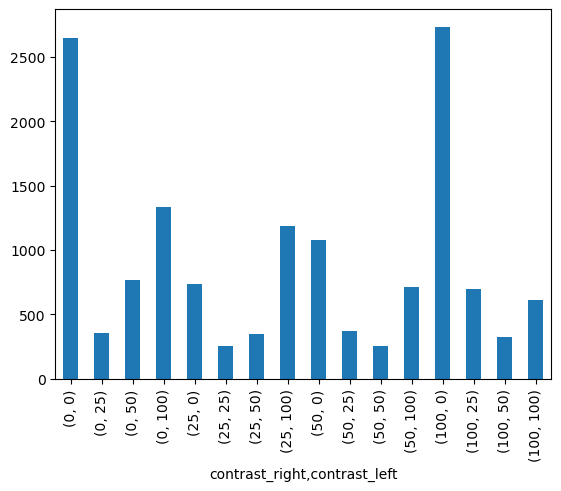

In [102]:
dft.groupby(["contrast_right","contrast_left"])["trial"].size().sort_index().plot.bar()

Make a horizontal bar plot showing how many sessions each mouse did.

<Axes: ylabel='mouse'>

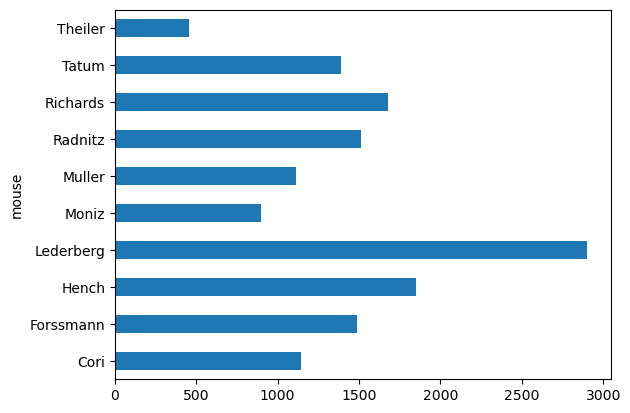

In [110]:
dft.groupby("mouse")["trial"].size().plot.barh()

Make a line plot showing how many trials there were for each contrast_left level.

<Axes: xlabel='contrast_left'>

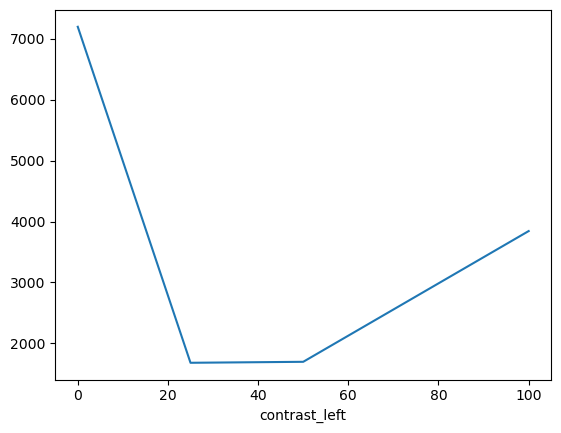

In [109]:
dft.groupby("contrast_left")["trial"].size().plot.line()

---

### Visualizing the Experimental Design using Some Useful Plotting Recipes

We'll be using the [**Seaborn package**](https://seaborn.pydata.org/) a lot in this course, which is a Python data visualization library that provides a high-level interface for creating attractive and informative statistical graphics. It integrates well with pandas DataFrames, making it especially useful for exploring and understanding data through its support for complex visualizations with minimal code and for producing plots that can easily convey insights from the data.

Let's try out a few of the Seaborn plotting functions using the following patterns:

| **Operation**                                                        | **Description**                                                                                                     |
|----------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| `sns.countplot(df['col1'])`                                          | Generates a count plot for the values in `col1`, showing the counts of the unique values of the column.            |
| `sns.histplot(df['col1'])`                                           | Creates a histogram for `col1`, visualizing the distribution of the column's values.                               |
| `sns.kdeplot(df['col1'])`                                            | Plots the Kernel Density Estimate (KDE) for `col1`, which estimates the probability density function of the column. |
| `sns.heatmap(df.groupby(['col1', 'col2'])['col3'].size().unstack())` | Generates a heatmap representing the size of groups formed by combining `col1` and `col2`, with `col3` values.     |

Let's make some plots of the data using Seaborn (`sns`)!

**Example**: How many trials were in each session?

<Axes: xlabel='count', ylabel='session_id'>

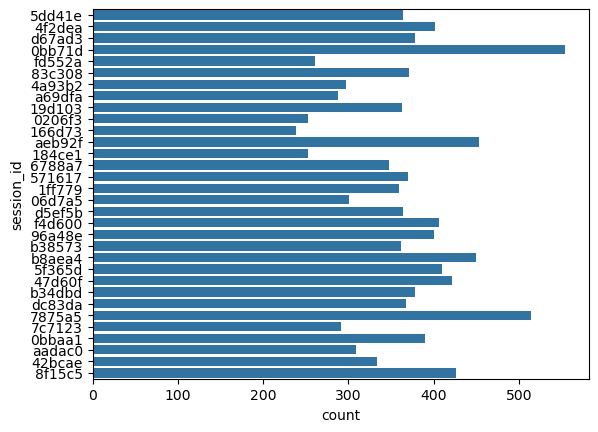

In [111]:
sns.countplot(data=df, y="session_id")

How many trials did each mouse do?

<Axes: ylabel='count'>

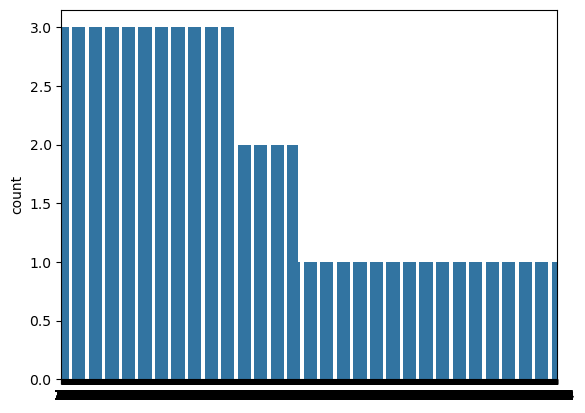

In [114]:
sns.countplot(dft["trial"])

Make a histogram of the response times in the dataset

<Axes: xlabel='response_time', ylabel='Count'>

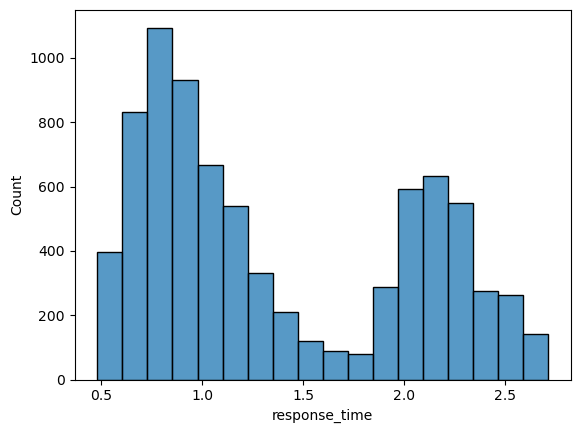

In [117]:
sns.histplot(df["response_time"])

Make a kernel density estimate (kind of a smoothed histogram) of the response times in the dataset.

<Axes: xlabel='response_time', ylabel='Density'>

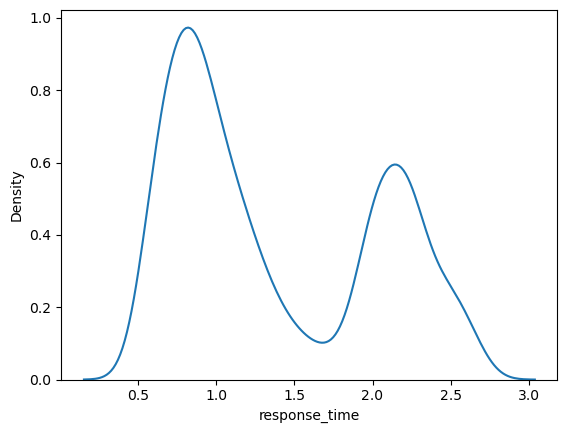

In [118]:
sns.kdeplot(df["response_time"])

This one is a little more complex: Using `groupby`, `size()`, and `unstack`, make a heatmap of showing number of contrast_left and contrast_right trials

<Axes: xlabel='contrast_left', ylabel='contrast_right'>

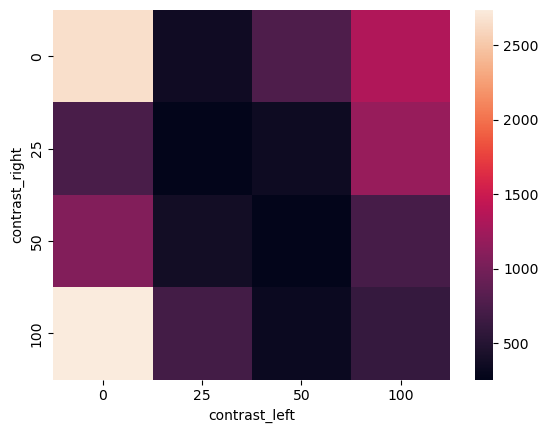

In [123]:
sns.heatmap((dft.groupby(["contrast_right","contrast_left"])["trial"]).size().unstack())

### Seaborn gallery

If you'd like to explore other kinds of plots that can be made using seaborn, check out their gallery [here](https://seaborn.pydata.org/examples/index.html) where you will find the complete code to create those plots.